In [12]:
# Importing necessary modules
import os
import re
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading required NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahar.SHEELU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mahar.SHEELU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahar.SHEELU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mahar.SHEELU\AppData\Roaming\nltk_data...


True

In [13]:
# Setting up stopwords and lemmatizer
STOPWORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()

In [14]:
# Loading documents from Materials folder
def load_documents(folder_path):
    data = {}
    doc_id_to_filename = {}
    doc_id = 0

    print(f'Scanning folder: {folder_path}')
    if not os.path.exists(folder_path):
        print(f'Folder not found: {folder_path}')
        return data, doc_id_to_filename

    for filename in os.listdir(folder_path):
        print(f'Found file: {filename}')
        if filename.endswith('.txt'):
            filepath = os.path.join(folder_path, filename)
            try:
                with open(filepath, 'r', encoding='utf-8') as file:
                    content = file.read()
                if content:
                    data[doc_id] = content
                    doc_id_to_filename[doc_id] = filename
                    print(f'Loaded doc_id {doc_id} -> {filename}')
                    doc_id += 1
            except Exception as e:
                print(f'Error loading {filename}: {e}')

    print(f'Total documents loaded: {len(data)}\n')
    return data, doc_id_to_filename

In [15]:
# Cleaning text by removing unwanted characters and lemmatizing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    cleaned_tokens = [LEMMATIZER.lemmatize(word) for word in tokens if word not in STOPWORDS and len(word) > 1]
    return ' '.join(cleaned_tokens)

In [16]:
# Building vector space model using TF-IDF
def build_vector_space_model(data):
    cleaned_docs = [clean_text(content) for content in data.values()]
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_matrix = vectorizer.fit_transform(cleaned_docs)
    return tfidf_matrix, vectorizer, cleaned_docs

In [17]:
# Calculating similarity scores between documents
def calculate_similarity(tfidf_matrix, doc_id_to_filename):
    similarity_matrix = cosine_similarity(tfidf_matrix)
    num_docs = len(doc_id_to_filename)
    print('Similarity scores between documents:\n')
    
    similarity_pairs = []
    for i in range(num_docs):
        for j in range(i + 1, num_docs):
            score = similarity_matrix[i][j]
            doc1 = doc_id_to_filename[i]
            doc2 = doc_id_to_filename[j]
            print(f'Similarity between {doc1} and {doc2}: {score:.4f}')
            similarity_pairs.append((doc1, doc2, score))
    
    return similarity_matrix, similarity_pairs

In [18]:
# Visualize similarity matrix as heatmap
def visualize_similarity(similarity_matrix, doc_id_to_filename):
    doc_names = [doc_id_to_filename[i] for i in sorted(doc_id_to_filename.keys())]
    sim_df = pd.DataFrame(similarity_matrix, index=doc_names, columns=doc_names)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_df, annot=True, fmt='.3f', cmap='viridis', square=True, cbar_kws={'label': 'Cosine Similarity'})
    plt.title('Document-to-Document Cosine Similarity Matrix')
    plt.tight_layout()
    plt.savefig('similarity_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return sim_df

Scanning folder: ./Materials
Found file: doc1_renewable_energy.txt
Loaded doc_id 0 -> doc1_renewable_energy.txt
Found file: doc2_ai_healthcare.txt
Loaded doc_id 1 -> doc2_ai_healthcare.txt
Found file: doc3_nepal_tourism.txt
Loaded doc_id 2 -> doc3_nepal_tourism.txt
Found file: doc4_football_performance.txt
Loaded doc_id 3 -> doc4_football_performance.txt
Found file: doc5_information_retrieval.txt
Loaded doc_id 4 -> doc5_information_retrieval.txt
Total documents loaded: 5

Sample cleaned text from each document:

Doc 0 (doc1_renewable_energy.txt) cleaned text (first 150 chars):
renewable energy technology expanded rapidly nation work toward cleaner resilient energy system solar wind power continue dominate global installation...

Doc 1 (doc2_ai_healthcare.txt) cleaned text (first 150 chars):
artificial intelligence transforming healthcare enhancing diagnostic accuracy predictive analytics personalized treatment strategy machine learning sy...

Doc 2 (doc3_nepal_tourism.txt) cleaned text

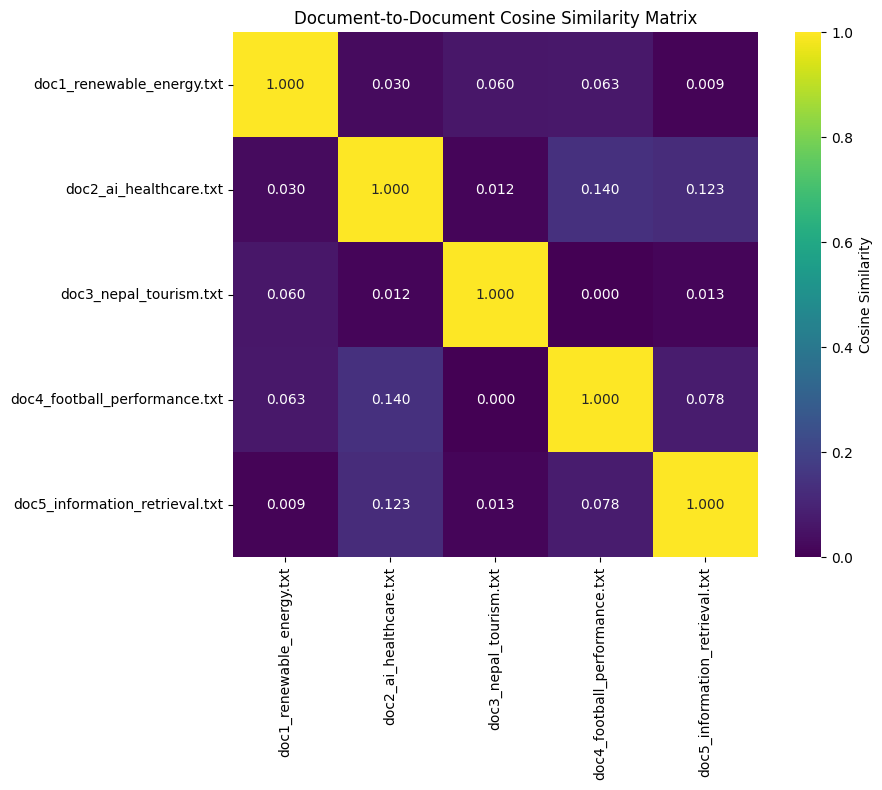


Similarity DataFrame:

                                doc1_renewable_energy.txt  \
doc1_renewable_energy.txt                        1.000000   
doc2_ai_healthcare.txt                           0.030196   
doc3_nepal_tourism.txt                           0.060144   
doc4_football_performance.txt                    0.063300   
doc5_information_retrieval.txt                   0.009093   

                                doc2_ai_healthcare.txt  \
doc1_renewable_energy.txt                     0.030196   
doc2_ai_healthcare.txt                        1.000000   
doc3_nepal_tourism.txt                        0.012368   
doc4_football_performance.txt                 0.139731   
doc5_information_retrieval.txt                0.123028   

                                doc3_nepal_tourism.txt  \
doc1_renewable_energy.txt                     0.060144   
doc2_ai_healthcare.txt                        0.012368   
doc3_nepal_tourism.txt                        1.000000   
doc4_football_performance.tx

In [19]:
# Running the main function
def main():
    folder_path = './Materials'  # Materials folder relative to notebook
    data, doc_id_to_filename = load_documents(folder_path)
    
    if len(data) < 2:
        print('Error: Need at least 2 documents to compute similarity.')
        return
    
    # Printing sample cleaned text for verification
    print('Sample cleaned text from each document:\n')
    for doc_id, content in data.items():
        cleaned = clean_text(content)
        print(f'Doc {doc_id} ({doc_id_to_filename[doc_id]}) cleaned text (first 150 chars):\n{cleaned[:150]}...\n')
    
    tfidf_matrix, vectorizer, cleaned_docs = build_vector_space_model(data)
    print(f'TF-IDF matrix shape: {tfidf_matrix.shape} (documents x features)\n')
    
    similarity_matrix, similarity_pairs = calculate_similarity(tfidf_matrix, doc_id_to_filename)
    
    # Visualize
    sim_df = visualize_similarity(similarity_matrix, doc_id_to_filename)
    print('\nSimilarity DataFrame:\n')
    print(sim_df)
    
    # Top similar pairs (sorted)
    print('\n\nTop similar document pairs (sorted by similarity score):\n')
    similarity_pairs_sorted = sorted(similarity_pairs, key=lambda x: x[2], reverse=True)
    for doc1, doc2, score in similarity_pairs_sorted:
        print(f'{doc1} <-> {doc2}: {score:.4f}')
    
    # Saving results to a file
    with open('similarity_results.txt', 'w', encoding='utf-8') as result_file:
        result_file.write('Document Similarity Analysis Results\n')
        result_file.write('=' * 50 + '\n\n')
        result_file.write('Similarity Matrix:\n')
        result_file.write(sim_df.to_string())
        result_file.write('\n\n' + '=' * 50 + '\n')
        result_file.write('Top Similar Pairs:\n')
        for doc1, doc2, score in similarity_pairs_sorted:
            result_file.write(f'{doc1} <-> {doc2}: {score:.4f}\n')
    
    print('\nResults saved to similarity_results.txt and similarity_heatmap.png')

if __name__ == '__main__':
    main()